# Espacios de color

Manipulación y cambio de espacio

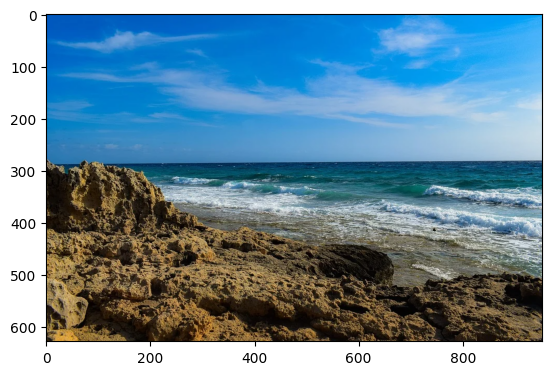

In [2]:


import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt


img = cv.imread('segmentacion.png')
plt.imshow(img[...,::-1])


### Ejercicio: Segmentar los elementos en la imagen

![image](segmentacion.png)

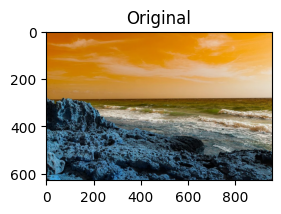

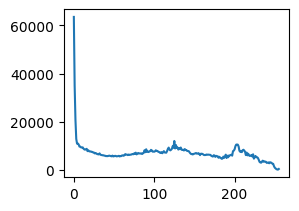

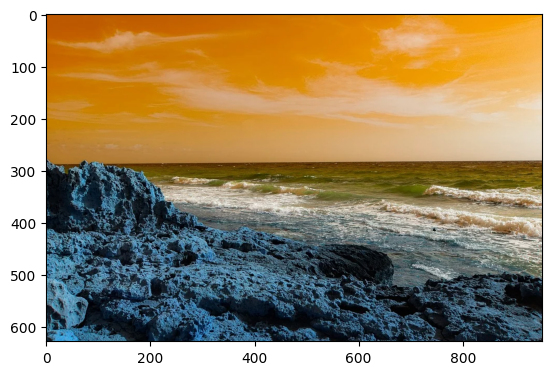

In [3]:
img=cv.imread('segmentacion.png')
# Nueva figura
fig = plt.figure()

# Imagen original
ax1=plt.subplot(221)
ax1.imshow(img, cmap='gray', vmin=0, vmax=255)
ax1.set_title('Original')

hist1, bins1 = np.histogram(img.ravel(), 256, [0, 256])



# Nueva figura
fig = plt.figure()

# Histogramas de la imagen
plt.subplot(221), plt.plot(hist1)
plt.show()
plt.imshow(img)

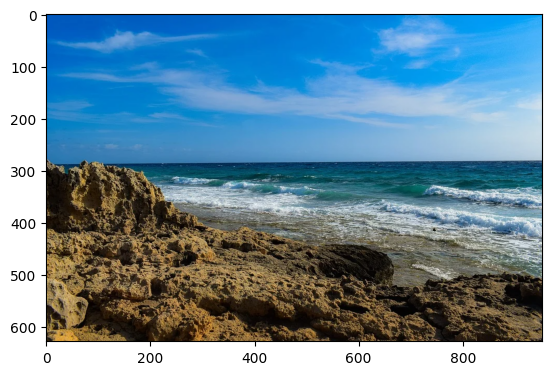

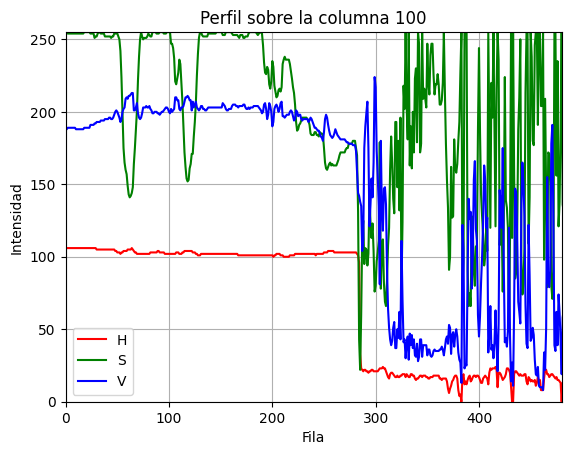

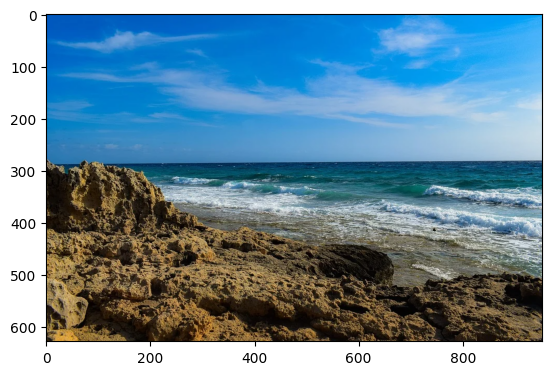

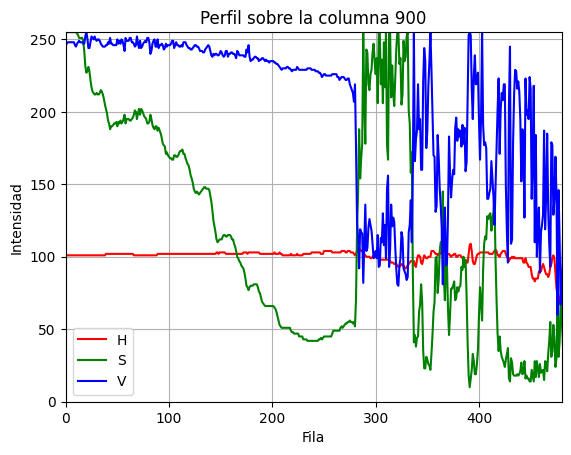

In [4]:
# Primera parte: encontrar un espacio de color conveniente para la discriminación

img_color = cv.imread('segmentacion.png')

imgHSV = cv.cvtColor(img_color, cv.COLOR_BGR2HSV)

plt.imshow(img_color[:,:,::-1])
plt.show()

idx_col = 100
perfil_color = imgHSV[:, idx_col]
plt.plot(perfil_color[:,0], color='r',label='H')
plt.plot(perfil_color[:,1], color='g',label='S')
plt.plot(perfil_color[:,2], color='b',label='V')
plt.xlabel('Fila')
plt.ylabel('Intensidad')
plt.title('Perfil sobre la columna {}'.format(idx_col))
plt.grid()
plt.xlim(0,480)
plt.ylim(0,255)
plt.legend()
plt.show()
# Me paro al principio de la imagen, veo que cuando hay solo cielo y tierrra. Se ve que el verde es factor comun, 
# pero la auscencia de azul y rojo, diferencia a la tierra del suelo
img_color = cv.imread('segmentacion.png')

imgHSV = cv.cvtColor(img_color, cv.COLOR_BGR2HSV)

plt.imshow(img_color[:,:,::-1])
plt.show()

idx_col = 900
perfil_color = imgHSV[:, idx_col]
plt.plot(perfil_color[:,0], color='r',label='H')
plt.plot(perfil_color[:,1], color='g',label='S')
plt.plot(perfil_color[:,2], color='b',label='V')
plt.xlabel('Fila')
plt.ylabel('Intensidad')
plt.title('Perfil sobre la columna {}'.format(idx_col))
plt.grid()
plt.xlim(0,480)
plt.ylim(0,255)
plt.legend()
plt.show()



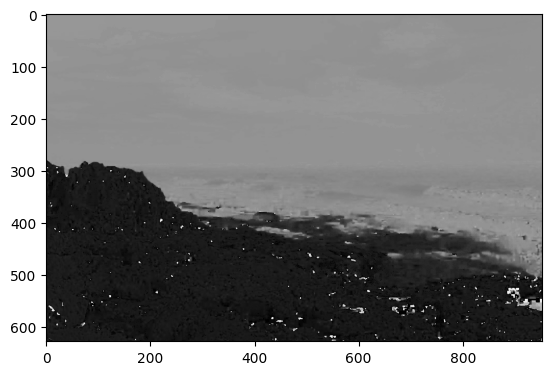

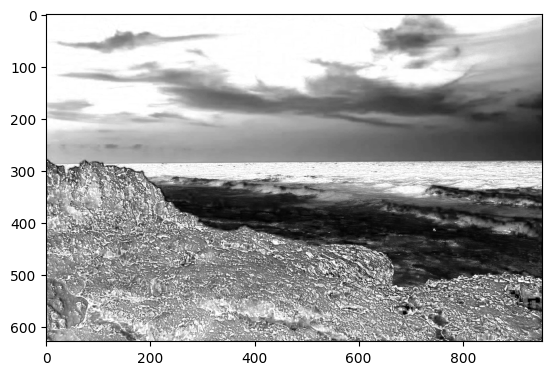

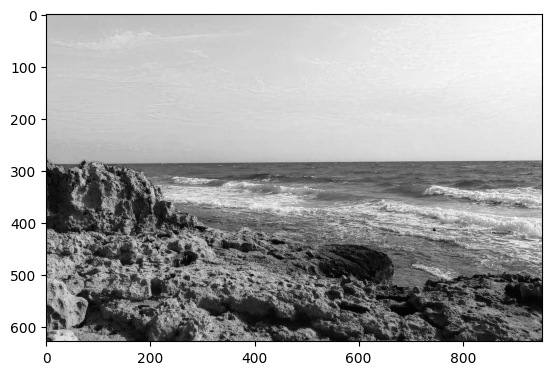

[ 17.82375 156.6421   98.94665]


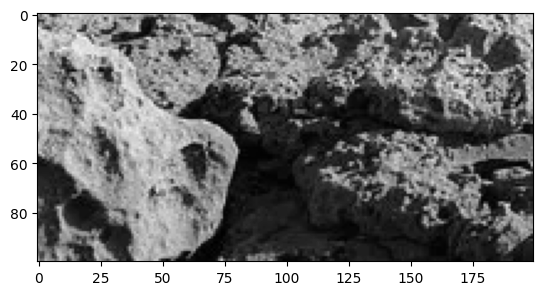

In [5]:
im_h, im_s, im_v = cv.split(imgHSV)

# La curva de Hue, discrimina fácilmente el color del de la tierra del resto
plt.imshow(im_h, cmap='gray')
plt.show()

# Puedo complementar con la curva de saturación, ya que ambas son muy uniformes sobre el tablero
plt.imshow(im_s,cmap='gray')
plt.show()

# La imagen de intensidad (V) permite discriminar fácilmente cielo, pero confunde el suelo con el agua
plt.imshow(im_v,cmap='gray')
plt.show()
# Hacemos una descripcion estadistica
muestra = imgHSV[500:600, 0:200, :]

color_medio = np.mean(muestra, axis=(0,1))
print(color_medio)

muestra = cv.cvtColor(muestra, cv.COLOR_HSV2BGR)
muestra = cv.cvtColor(muestra, cv.COLOR_BGR2GRAY)
plt.figure()
plt.imshow(muestra, cmap='gray')
plt.show()

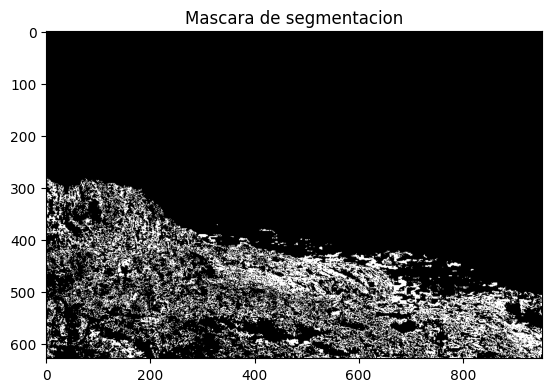

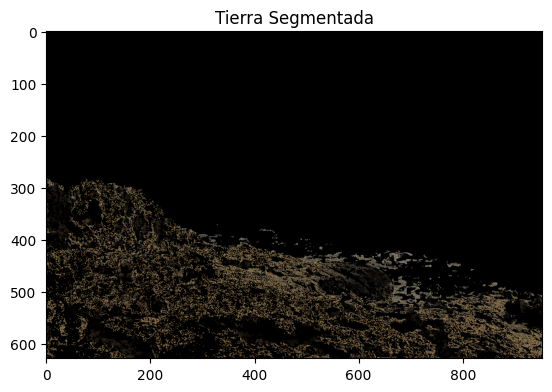

In [6]:
val_h_medio = color_medio[0]
color_l = (val_h_medio-5, 10, 10)
color_u = (val_h_medio+5, 150, 150)

mask = cv.inRange(imgHSV, color_l,  color_u)
img_segmentada = cv.bitwise_and(img_color, img_color, mask=mask)

plt.imshow(mask, cmap='gray')
plt.title('Mascara de segmentacion')
plt.show()
plt.imshow(img_segmentada[:,:,::-1])
plt.title('Tierra Segmentada')
plt.show()

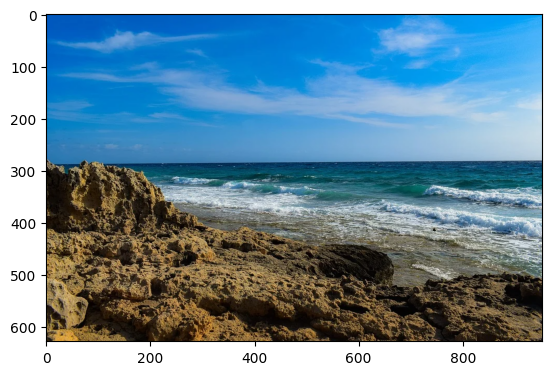

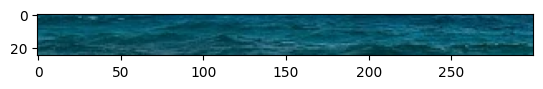

[11.685733333333333, 83.30813333333333, 101.54506666666667]
[12.692928600690317, 15.433119813641822, 16.904412707797785]


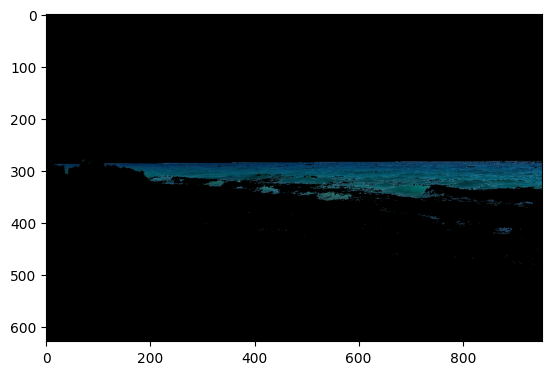

<function matplotlib.pyplot.show(close=None, block=None)>

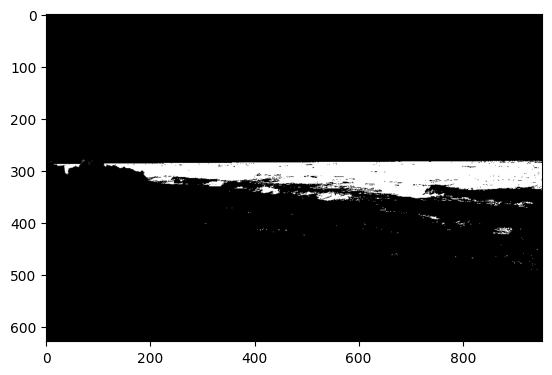

In [7]:
# Separo el mar
img_color = cv.imread('segmentacion.png')
imgRGB = cv.cvtColor(img_color, cv.COLOR_BGR2RGB)

plt.figure(1)
plt.imshow(imgRGB)
plt.show()

img_muestra = imgRGB[300:325,600:900,:]
plt.figure(2)
plt.imshow(img_muestra)
plt.show()

color_mean, color_std = cv.meanStdDev(img_muestra)
print(color_mean.flatten().tolist())
print(color_std.flatten().tolist())

# Pintemos de blanco los puntos que estén cerca de la media en un radio menor que 3 sigmas
# para ¨capturar¨ el 99.7 % de pixeles.
n_sigma = 3
mask = cv.inRange(imgRGB, color_mean-color_std * n_sigma,  color_mean+color_std * n_sigma)
img_segmentada = cv.bitwise_and(imgRGB, imgRGB, mask=mask)

plt.figure(3)
plt.imshow(img_segmentada)
plt.show()

plt.figure(4)
plt.imshow(mask,cmap='gray')
plt.show

(96.09530000000001, 228.8374, 100.7107, 0.0)


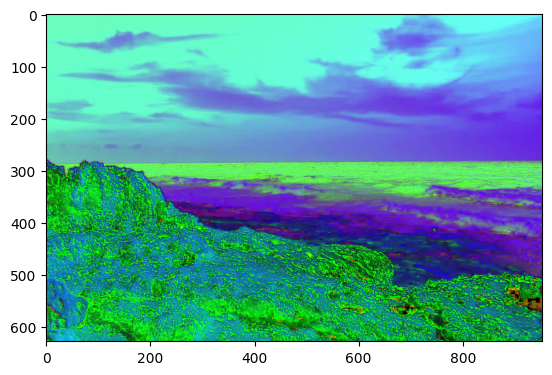

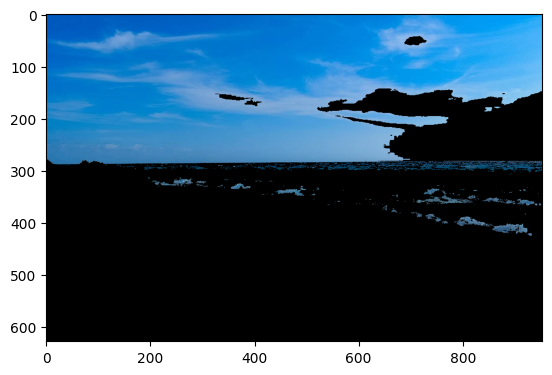

In [8]:
# Separo el cielo
img_HSV = cv.cvtColor(img_color, cv.COLOR_BGR2HSV)
plt.figure(5)
plt.imshow(img_HSV)

#img_muestra = img_HSV[100:150,325:375,:]
img_muestra_hsv = img_HSV[300:320,400:900,:]

# Separo el cielo
color_mean = cv.mean(img_muestra_hsv)
    
print(color_mean)

color_l = (100,100,100)
color_u = (110,255,255)

mask = cv.inRange(img_HSV, color_l,  color_u)
img_segmentada = cv.bitwise_and(imgRGB, imgRGB, mask=mask)

plt.figure(6)
plt.imshow(img_segmentada)
plt.show()


